# Travel Assured

## Introduction
Travel Assured is a travel insurance company. Due to the COVID pandemic they have had to cut their marketing budget by over 50%. It is more important than ever that they advertise in the right places and to the right people.

Travel Assured has data on their current customers as well as people who got quotes but never bought insurance. They want to know if there are differences in the travel habits between customers and non-customers - they believe they are more likely to travel often (buying tickets from frequent flyer miles) and travel abroad.

## The Data
- `age`: Numeric, the customer’s age
- `Employment Type`: Character, the sector of employment
- `GraduateOrNot`: Character, whether the customer is a college graduate
- `AnnualIncome`: Numeric, the customer’s yearly income
- `FamilyMembers`: Numeric, the number of family members living with the customer
- `ChronicDiseases`: Numeric, whether the customer has any chronic conditions
- `FrequentFlyer`: Character, whether a customer books frequent tickets
- `EverTravelledAbroad`: Character, has the customer ever travelled abroad
- `TravelInsurance`: Numeric, whether the customer bought travel insurance

## Import Libraries
Let us set up all the objects (packages, and modules) that we will need to explore the dataset.

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Load the Data

In [2]:
# Read file
df = pd.read_csv('data/travel_insurance.csv')

# Split the data in two subgroups, to compare data with/without Travel Insurance
insured_df = df[df['TravelInsurance'] == 1]
uninsured_df = df[df['TravelInsurance'] == 0]
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data Size and Structure

- Dataset comprises of 1987 observations and 9 columns.
- 8 independent variables: `Age`, `Employement Type`, `GraduateOrNot`, `AnnualIncome`, `FamilyMembers`, `ChronicDiseases`, `FrequentFlyer`, `EverTravelledAbroad`
    - 3 numerical features, 5 categorical features
- 1 dependent variable: `TravelInsurance`
- Complete dataset with no missing/null values.

In [3]:
# Check the size and datatypes of the DataFrame
print(f"Shape: {df.shape}")
print('\n')
print(df.info())

Shape: (1987, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB
None


In [4]:
# For all categorical data columns
# Print categories and the number of times they appear
# ChornicDiseases and TravelInsurance at categorical because 1 and 0 represent yes and no
CAT_COLS = ['Employment Type', 'GraduateOrNot', "ChronicDiseases", "FrequentFlyer", "EverTravelledAbroad", "TravelInsurance"]

for col in df[CAT_COLS]:
    print(df[col].value_counts())
    print('\n')

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64


Yes    1692
No      295
Name: GraduateOrNot, dtype: int64


0    1435
1     552
Name: ChronicDiseases, dtype: int64


No     1570
Yes     417
Name: FrequentFlyer, dtype: int64


No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64


0    1277
1     710
Name: TravelInsurance, dtype: int64




In [5]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [6]:
# Percentage of dataset is null
df.isnull().sum() / len(df) * 100

Age                    0.0
Employment Type        0.0
GraduateOrNot          0.0
AnnualIncome           0.0
FamilyMembers          0.0
ChronicDiseases        0.0
FrequentFlyer          0.0
EverTravelledAbroad    0.0
TravelInsurance        0.0
dtype: float64

In [7]:
insured_df.value_counts('EverTravelledAbroad')

EverTravelledAbroad
No     412
Yes    298
dtype: int64

## Exploratory Data Analysis
Let's define the global variables and functions that we will use regularly throughout the analysis.

In [34]:
LABELS = ['No', 'Yes'] # travel insurance labels

def label_fontsize(fontsize):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)

### What are the travel habits of the insured and uninsured?

Now let's first look at the people's travel habits.

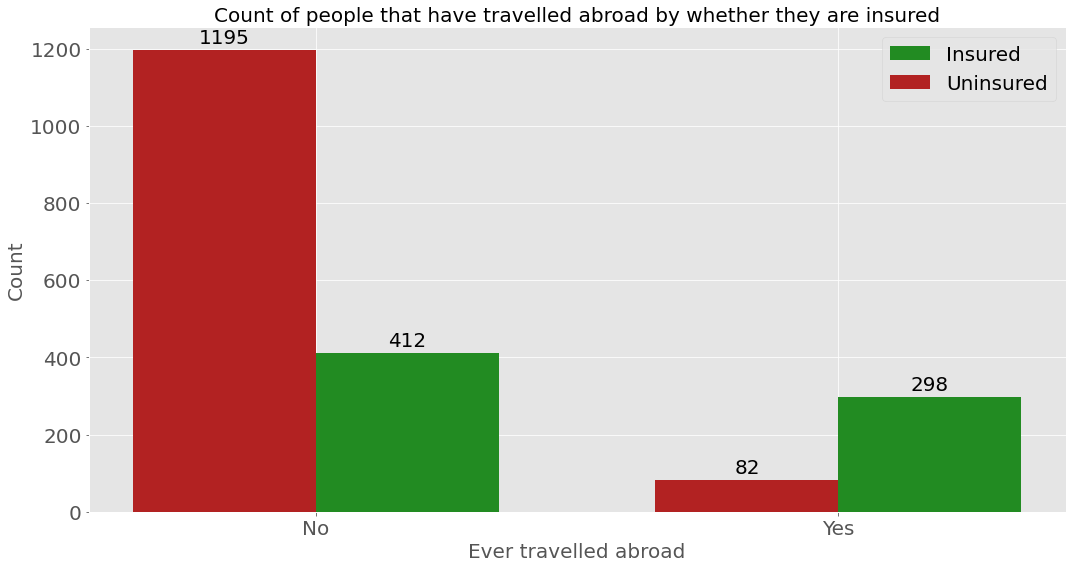

In [35]:
insured_travelled = insured_df.value_counts('EverTravelledAbroad').values
uninsured_travelled = uninsured_df.value_counts('EverTravelledAbroad').values

x = np.arange(len(LABELS))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x + width/2, insured_travelled, width, label='Insured', color='forestgreen')
rects2 = ax.bar(x - width/2, uninsured_travelled, width, label='Uninsured', color='firebrick')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Ever travelled abroad')
ax.set_ylabel('Count')
ax.set_title('Count of people that have travelled abroad by whether they are insured')
ax.set_xticks(x)
ax.set_xticklabels(LABELS)
ax.legend(prop={'size': 20})

ax.bar_label(rects1, padding=3, fontsize=20)
ax.bar_label(rects2, padding=3, fontsize=20)

label_fontsize(20)

fig.tight_layout()
plt.show()

## Frequent Flyer

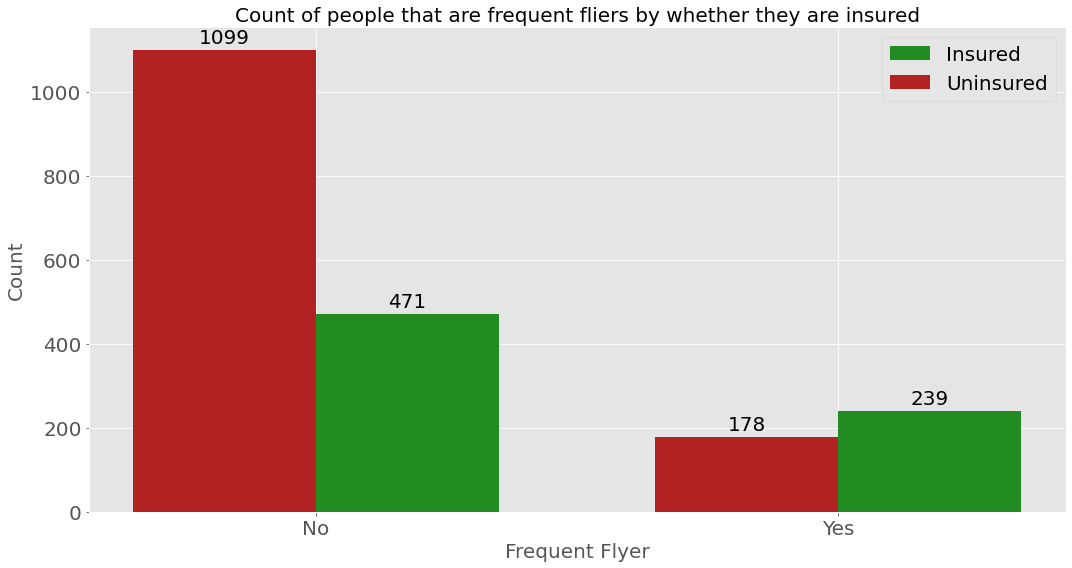

In [14]:
insured_freqfly = insured_df.value_counts('FrequentFlyer').values
uninsured_freqfly = uninsured_df.value_counts('FrequentFlyer').values

x = np.arange(len(LABELS))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x + width/2, insured_freqfly, width, label='Insured', color='forestgreen')
rects2 = ax.bar(x - width/2, uninsured_freqfly, width, label='Uninsured', color='firebrick')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Frequent Flyer')
ax.set_ylabel('Count')
ax.set_title('Count of people that are frequent fliers by whether they are insured')
ax.set_xticks(x)
ax.set_xticklabels(LABELS)
ax.legend(prop={'size': 20})

ax.bar_label(rects1, padding=3, fontsize=20)
ax.bar_label(rects2, padding=3, fontsize=20)

label_fontsize(20)

fig.tight_layout()
plt.show()

## Chronic Diseases

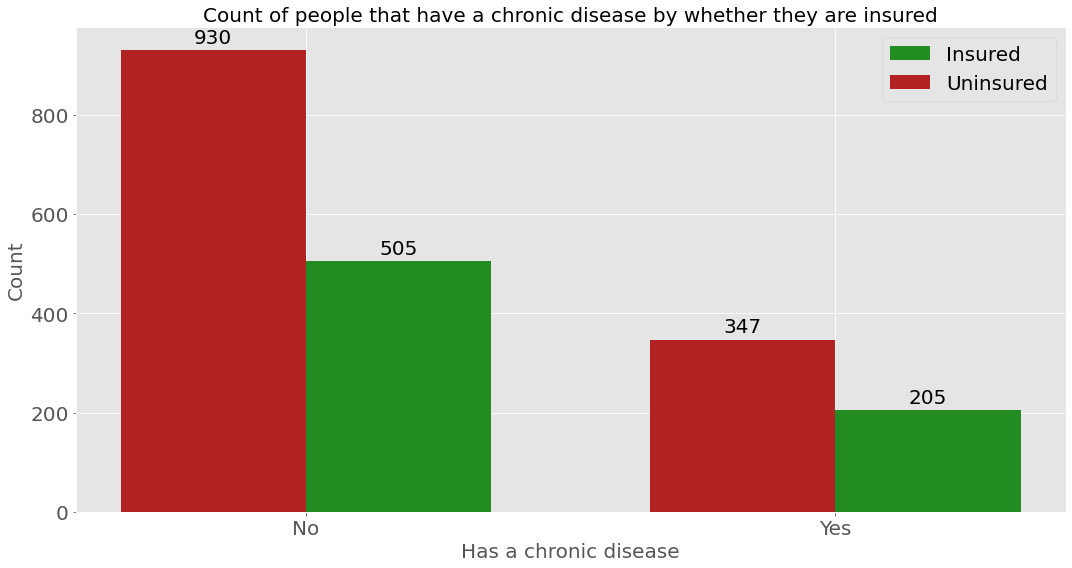

In [15]:
insured_chronic = insured_df.value_counts('ChronicDiseases').values
uninsured_chronic = uninsured_df.value_counts('ChronicDiseases').values

x = np.arange(len(LABELS))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x + width/2, insured_chronic, width, label='Insured', color='forestgreen')
rects2 = ax.bar(x - width/2, uninsured_chronic, width, label='Uninsured', color='firebrick')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Has a chronic disease')
ax.set_ylabel('Count')
ax.set_title('Count of people that have a chronic disease by whether they are insured')
ax.set_xticks(x)
ax.set_xticklabels(LABELS)
ax.legend(prop={'size': 20})
ax.bar_label(rects1, padding=3, fontsize=20)
ax.bar_label(rects2, padding=3, fontsize=20)
label_fontsize(20)

fig.tight_layout()
plt.show()

## Family Members

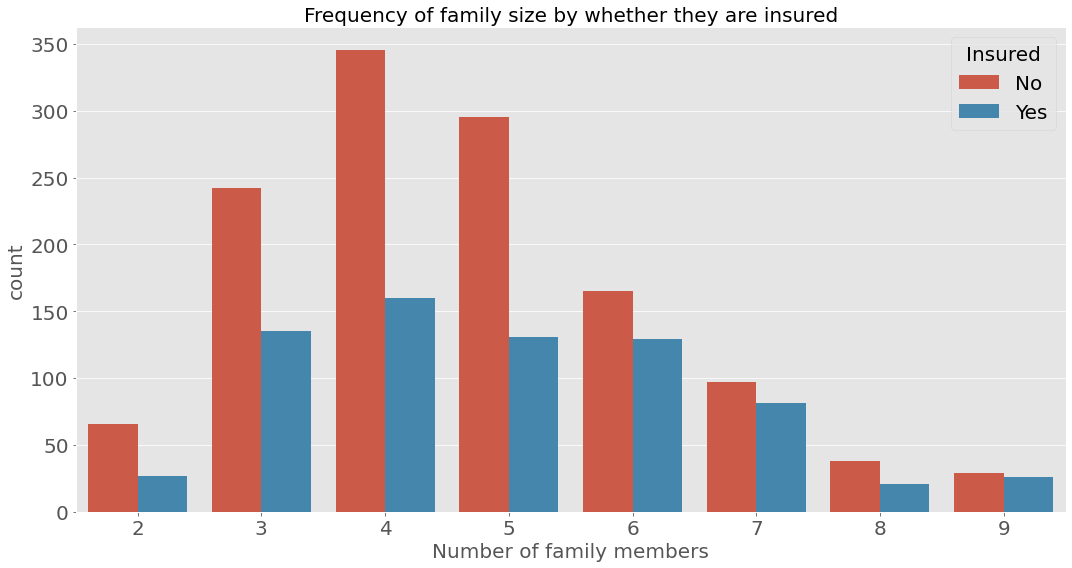

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x="FamilyMembers", data=df, hue="TravelInsurance")
ax.set_xlabel('Number of family members')
ax.set_title('Frequency of family size by whether they are insured')
ax.legend(title="Insured", labels=LABELS, fontsize=20, title_fontsize=20)
label_fontsize(20)
fig.tight_layout()
plt.show()

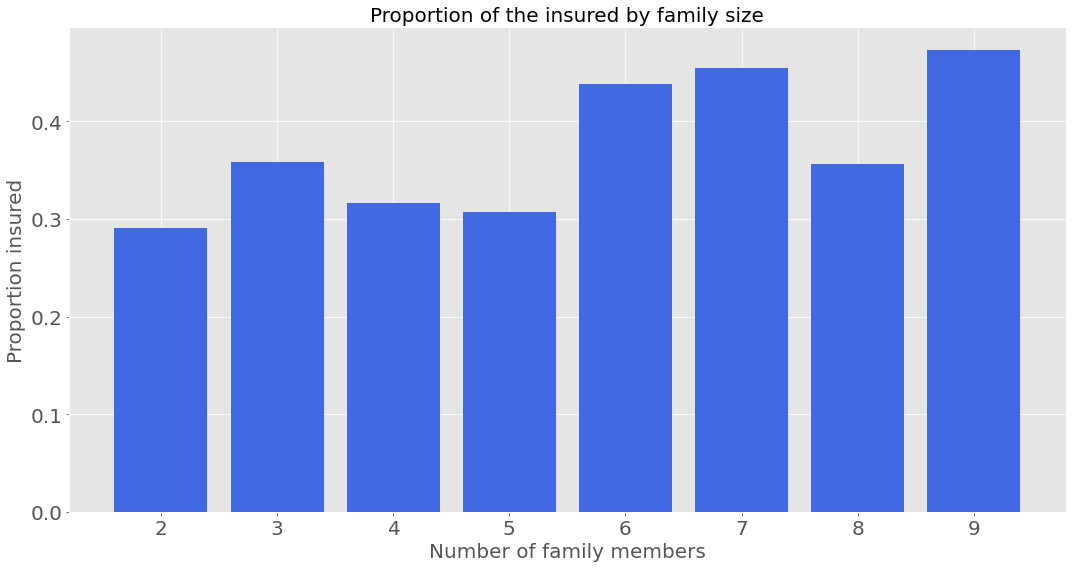

In [33]:
insured_fam_prop = insured_df.value_counts('FamilyMembers') / df.value_counts('FamilyMembers')

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(insured_fam_prop.index, insured_fam_prop, color='royalblue')

ax.set_xlabel('Number of family members')
ax.set_ylabel('Proportion insured')
ax.set_title('Proportion of the insured by family size')
label_fontsize(20)
fig.tight_layout()
plt.show()

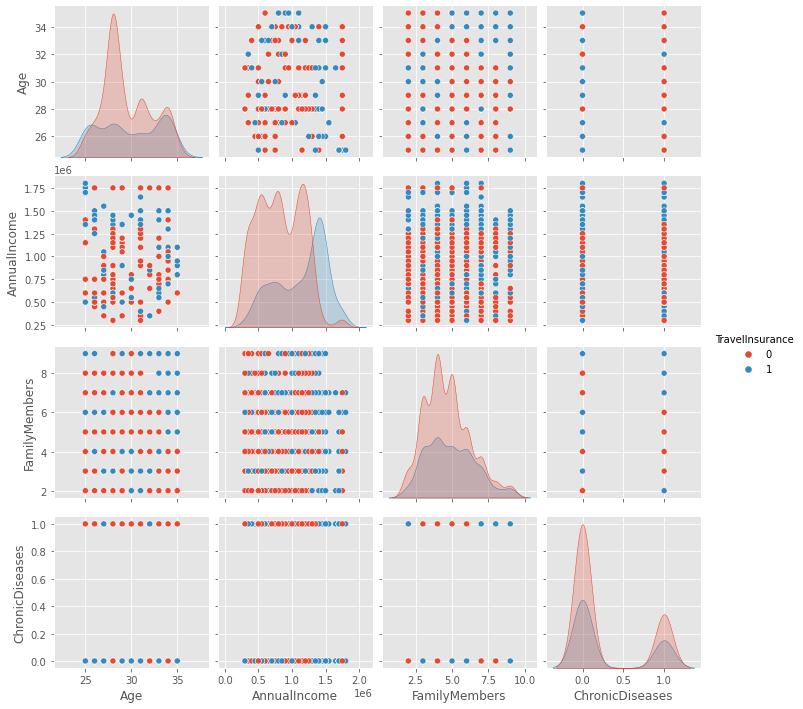

In [36]:
sns.pairplot(df, hue='TravelInsurance')